Test with optimized configurations

In [1]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

## WH results

In [26]:
df_wh_opt = pd.read_csv("baseline/wh_results/wormhole_full_results.csv")
df_wh_oob = pd.read_csv("baseline/wh_results/wormhole_results.csv")

df_wh_oob

,m,k,n,use_trace,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,inference_time_avg (ns),TFLOPs (avg),Utilization (vs user grid),Utilization (vs 8x8 full grid)
0,512,512,512,False,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,400640.96,0.67,0.51%,0.51%
1,512,1024,1024,False,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,296726.23,3.62,2.76%,2.76%
2,512,1024,2048,False,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,297236.44,7.22,5.51%,5.51%
3,1024,1024,1024,False,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,299668.31,7.17,5.47%,5.47%
4,1024,1024,2048,False,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,300722.12,14.28,10.90%,10.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2048,3072,3072,True,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT4_B,MathFidelity.LoFi,232594.01,166.19,63.40%,63.40%
74,3072,3072,3072,True,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT4_B,MathFidelity.LoFi,333464.15,173.88,66.33%,66.33%
75,3072,3072,4096,True,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT4_B,MathFidelity.LoFi,437791.35,176.59,67.36%,67.36%
76,3072,4096,4096,True,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT4_B,MathFidelity.LoFi,551083.09,187.05,71.35%,71.35%


In [43]:
df_wh_oob = df_wh_oob[(df_wh_oob['m'] == df_wh_oob['k']) & (df_wh_oob['k'] == df_wh_oob['n'])]
df_wh_opt = df_wh_opt[(df_wh_opt['m'] == df_wh_opt['k']) & (df_wh_opt['k'] == df_wh_opt['n'])]
df_wh_opt = df_wh_opt[df_wh_opt['m'] <= 4096]
df_wh_opt = df_wh_opt[df_wh_opt['use_trace'] == False]
df_wh_oob = df_wh_oob[df_wh_oob['use_trace'] == False]
df_wh_oob = df_wh_oob[df_wh_oob['math_fidelity'] == "MathFidelity.HiFi2"]
df_wh_opt = df_wh_opt[df_wh_opt['math_fidelity'] == "MathFidelity.HiFi2"]
df_wh_opt = df_wh_opt[df_wh_opt['dtype'] == "DataType.BFLOAT16"]
df_wh_oob = df_wh_oob[df_wh_oob['dtype'] == "DataType.BFLOAT16"]

df = pd.DataFrame()
df['oob'] = df_wh_oob['TFLOPs (avg)']
df['opt'] = df_wh_opt['TFLOPs (avg)']
df.index = df_wh_oob['m']
df

,oob,opt
m,,
512,0.67,0.71
1024,7.17,5.96
2048,56.30,47.67
3072,64.28,73.31
4096,63.39,66.17


In [2]:
df = pd.read_csv("./results/opt/mm_complete_1.0.csv")
pd.options.display.max_rows = 999
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
df

,conf,m,use_trace,in0_sharded,out_sharded,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,transfer_time_in0,transfer_time_in1,kernel_config_time,first_run_time,second_run_time,compile_time,inference_time_avg,TFLOPs (avg),Utilization (vs user grid),Utilization (vs 8x8 full grid)
0,f16_m2,256,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,7054.76,6531.56,57.39,158181.11,371.64,157809.47,257.33,0.13,0.10%,0.07%
1,f16_m2,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,25440.96,24308.20,59.77,160608.24,365.43,160242.81,244.19,1.10,0.84%,0.61%
2,f16_m2,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,97830.64,95796.93,62.99,162242.12,385.12,161857.00,243.73,8.81,6.72%,4.89%
3,f16_m2,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,395579.62,397300.06,82.22,184993.31,708.64,184284.67,399.80,42.97,32.78%,23.84%
4,f16_m2,3072,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,862264.18,868134.05,59.54,178257.73,2184.18,176073.55,1990.74,29.13,22.22%,16.16%
5,f16_m2,4096,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,1547072.15,1533871.07,62.46,190421.52,4418.33,186003.19,4383.52,31.35,23.92%,17.40%
6,f16_m2,8192,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,6231834.34,6160305.34,64.91,209736.86,28122.78,181614.08,29435.45,37.35,28.50%,20.73%
7,f16_m4,256,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,7181.36,6397.51,56.29,81254.78,394.43,80860.35,243.64,0.14,0.21%,0.15%
8,f16_m4,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,25498.42,24252.34,61.27,82773.48,383.38,82390.10,244.95,1.10,1.67%,1.22%
9,f16_m4,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,97682.81,95554.61,63.25,83099.42,381.37,82718.05,248.80,8.63,13.17%,9.58%


In [5]:
import ttnn
ttnn.DataType

2025-02-19 10:36:49.628 | DEBUG    | ttnn:<module>:82 - Initial ttnn.CONFIG:
Config{cache_path=/home/bach/.cache/ttnn,model_cache_path=/home/bach/.cache/ttnn/models,tmp_dir=/tmp/ttnn,enable_model_cache=false,enable_fast_runtime_mode=true,throw_exception_on_fallback=false,enable_logging=false,enable_graph_report=false,enable_detailed_buffer_report=false,enable_detailed_tensor_report=false,enable_comparison_mode=false,comparison_mode_pcc=0.9999,root_report_path=generated/ttnn/reports,report_name=std::nullopt,std::nullopt}
2025-02-19 10:36:50.781 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.pearson_correlation_coefficient be migrated to C++?
2025-02-19 10:36:50.782 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.Conv1d be migrated to C++?
2025-02-19 10:36:50.783 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.conv2d be migrated to C++?
2025-02-19 10:36:50.790 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.unsq

ttnn._ttnn.tensor.DataType

In [4]:
df_unique = df[['conf', 'dtype', 'math_fidelity']].drop_duplicates()
print(df_unique.to_latex(index=False))

\begin{tabular}{lll}
\toprule
conf & dtype & math_fidelity \\
\midrule
f16_m2 & DataType.BFLOAT16 & MathFidelity.HiFi2 \\
f16_m4 & DataType.BFLOAT16 & MathFidelity.HiFi4 \\
f8b_m2 & DataType.BFLOAT8_B & MathFidelity.HiFi2 \\
f8b_m0 & DataType.BFLOAT8_B & MathFidelity.LoFi \\
f4b_m0 & DataType.BFLOAT4_B & MathFidelity.LoFi \\
\bottomrule
\end{tabular}



In [8]:
conf_infos = dict()
infs = ['use_trace', 'in0_sharded', 'out_sharded', 'in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m2': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'},
 'f16_m4': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi4'},
 'f8b_m2': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT8_B',
  'math_fidelity': 'MathFidelity.HiFi2'},
 'f8b_m0': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT8_B',
  'math_fidelity': 'MathFidelity.LoFi'},
 'f4b_m0': {'use_trace': False,
  'in0_sharded'

In [3]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

## Transfer time

In [5]:
df_transf0 = get_column_df_info(df, 'transfer_time_in0', mean=True)
df_transf1 = get_column_df_info(df, 'transfer_time_in1', mean=True)

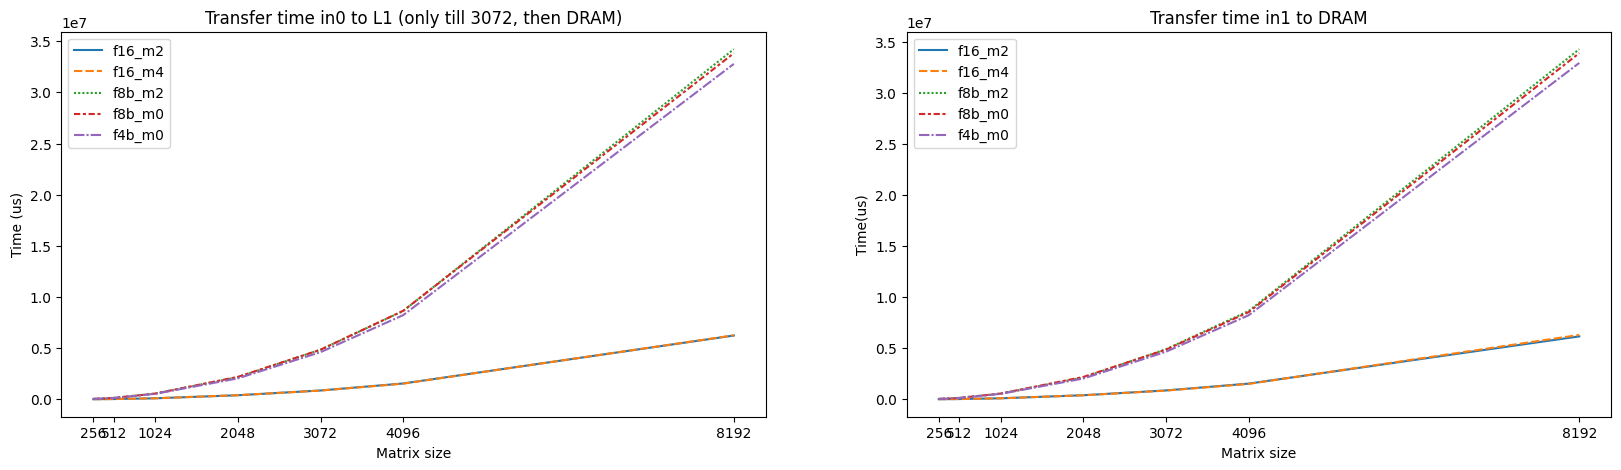

In [6]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_transf0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer time in0 to L1 (only till 3072, then DRAM)")

plot = sns.lineplot(df_transf1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Transfer time in1 to DRAM")

plt.show()


In [6]:
df_transf0_dtype = get_column_df_info(df, 'transfer_time_in0', c_name="dtype", mean=True)
df_transf1_dtype = get_column_df_info(df, 'transfer_time_in1', c_name="dtype", mean=True)

In [7]:
df_transf0_dtype

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,7118.060,3.948449e+04,34493.91
512,25469.690,1.384233e+05,129186.30
1024,97756.725,5.596983e+05,535862.21
2048,399103.080,2.178998e+06,2046934.48
3072,858381.990,4.847460e+06,4610045.56
4096,1538130.320,8.643542e+06,8228607.97
8192,6242347.110,3.402092e+07,32781887.76


In [8]:
df_transf1_dtype

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,6464.535,3.621098e+04,33523.69
512,24280.270,1.384217e+05,128451.96
1024,95675.770,5.600368e+05,532329.69
2048,395613.210,2.161961e+06,2033046.69
3072,859573.955,4.883838e+06,4658945.78
4096,1521139.680,8.589695e+06,8228733.30
8192,6230972.065,3.408694e+07,32938523.50


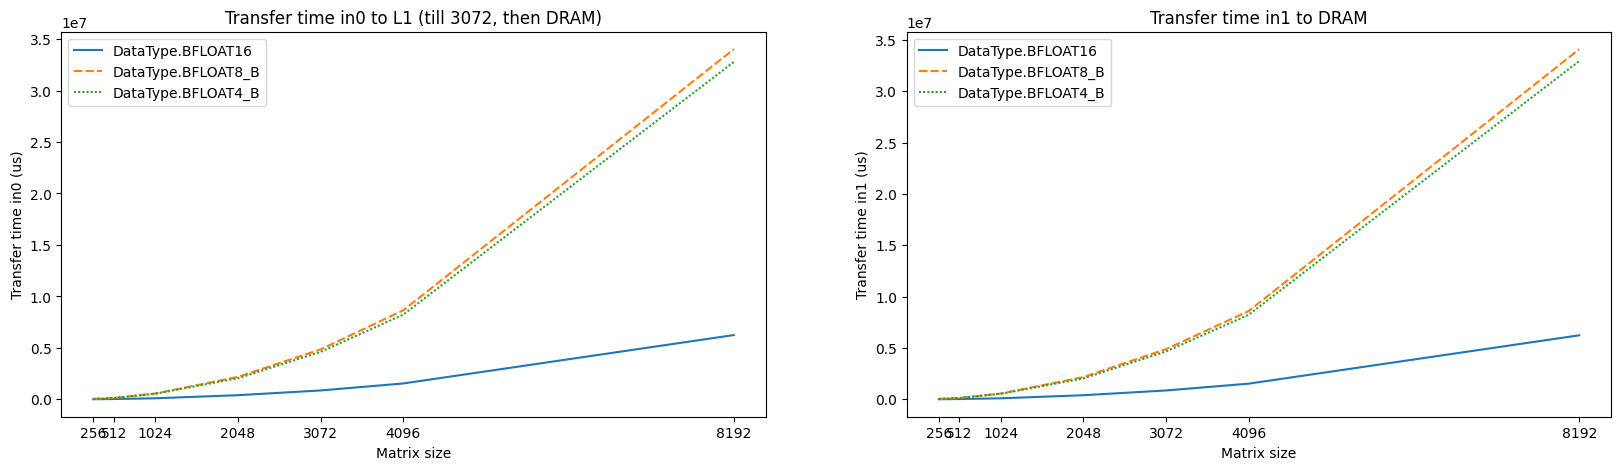

In [9]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_transf0_dtype, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in0 (us)")
plot.set_title("Transfer time in0 to L1 (till 3072, then DRAM)")

plot = sns.lineplot(df_transf1_dtype, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in1 (us)")

plot.set_title("Transfer time in1 to DRAM")

plt.show()


The percentage difference is small, valuable only for 256 matrix

In [10]:
df_transf_comp = (df_transf0 - df_transf1)/df_transf0 * 100
df_transf_comp

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,7.416269,10.915063,7.062429,9.498190,2.812728
512,4.452505,4.886891,-0.350874,0.365305,0.568435
1024,2.078807,2.178684,0.240780,-0.364027,0.659222
2048,-0.434916,2.160856,1.326693,0.243745,0.678468
3072,-0.680751,0.407951,-1.203055,-0.297552,-1.060732
4096,0.853294,1.358904,-0.133772,1.377949,-0.001523
8192,1.147800,-0.780106,-0.178634,-0.209683,-0.477812


### Calculate Mb/s transfer

In [11]:
df_transf_norm_b = pd.DataFrame()
elements = df_transf0_dtype.index * df_transf0_dtype.index

df_transf_norm_b['DataType.BFLOAT16'] = (16 * elements) / df_transf0_dtype['DataType.BFLOAT16'] 
df_transf_norm_b['DataType.BFLOAT8_B'] = (8 * elements + (elements)//16) / df_transf0_dtype['DataType.BFLOAT8_B']
df_transf_norm_b['DataType.BFLOAT4_B'] = (4 * elements + (elements)//16) / df_transf0_dtype['DataType.BFLOAT4_B']

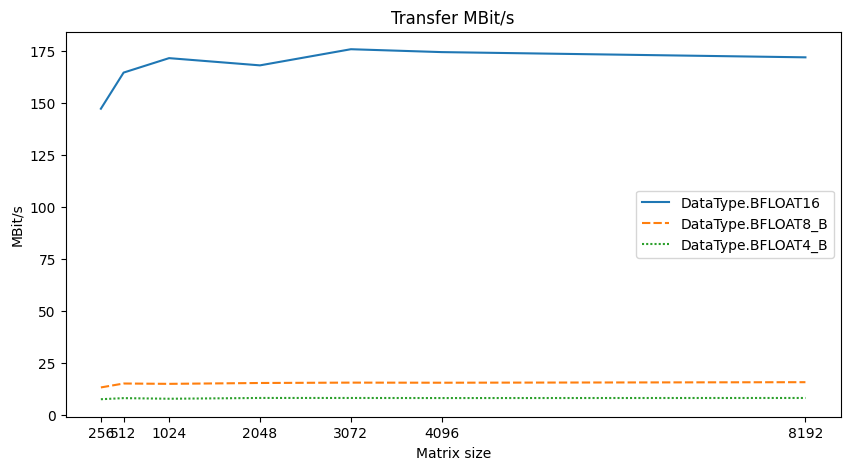

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("MBit/s")
plot.set_title("Transfer MBit/s")

plt.show()

### Normalize by bytes

In [13]:
# Tot L1 grid
8 * 12

96

In [14]:
(16 * elements)/1e6

Index([1.048576, 4.194304, 16.777216, 67.108864, 150.994944, 268.435456,
       1073.741824],
      dtype='float64')

In [15]:
df_transf_norm_b = pd.DataFrame()
df_transf_norm_b['DataType.BFLOAT16'] = df_transf0_dtype['DataType.BFLOAT16'] / (16 * elements)
df_transf_norm_b['DataType.BFLOAT8_B'] = df_transf0_dtype['DataType.BFLOAT8_B'] / (8 * elements + (elements)//16)
df_transf_norm_b['DataType.BFLOAT4_B'] = df_transf0_dtype['DataType.BFLOAT4_B'] / (4 * elements + (elements)//16)

In [16]:
df_transf_norm_b

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,0.006788,0.074727,0.129559
512,0.006072,0.065494,0.121306
1024,0.005827,0.066204,0.125794
2048,0.005947,0.064436,0.120130
3072,0.005685,0.063709,0.120246
4096,0.005730,0.063900,0.120729
8192,0.005814,0.062878,0.120243


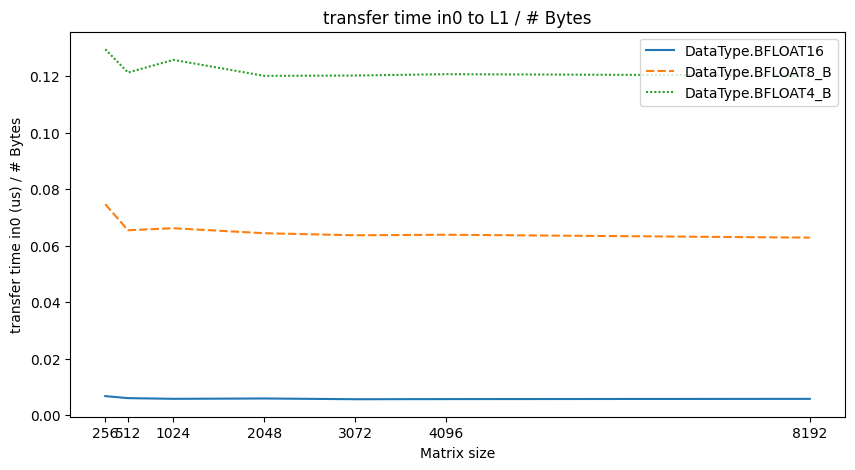

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("transfer time in0 (us) / # Bytes")
plot.set_title("transfer time in0 to L1 / # Bytes")

plt.show()

## Compile time

In [18]:
df_compile = get_column_df_info(df, 'compile_time')
df_compile

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,157809.47,80860.35,104324.67,81145.16,157589.06
512,160242.81,82390.10,103874.79,83826.13,162613.58
1024,161857.00,82718.05,116022.33,93210.94,145867.23
2048,184284.67,95577.20,169829.19,90592.75,166598.67
3072,176073.55,85558.75,172414.76,85858.16,173368.63
4096,186003.19,92600.43,181337.20,89990.37,172481.08
8192,181614.08,88745.72,179254.80,88900.45,183387.70


To be cleared

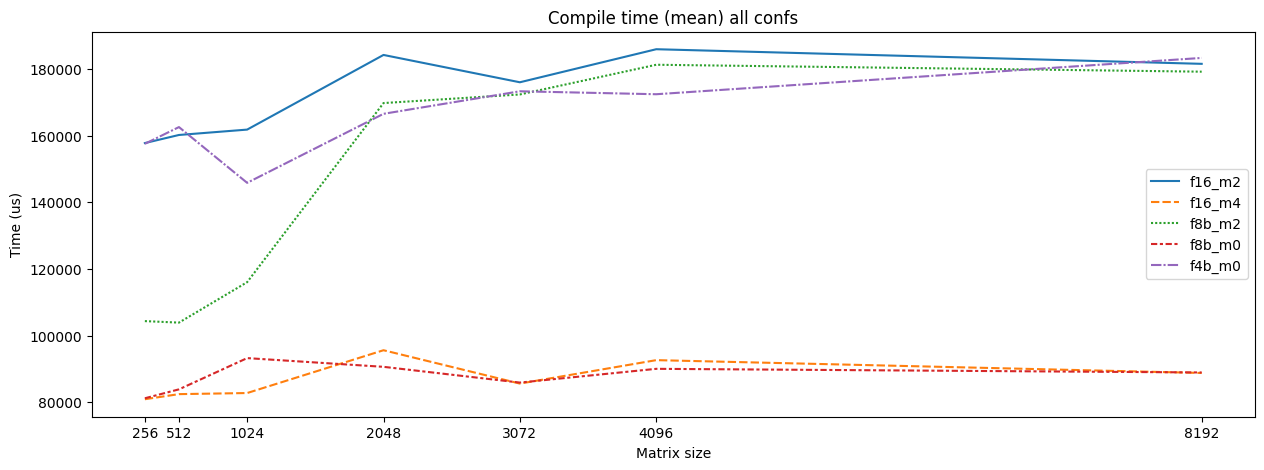

In [19]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compile, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Compile time (mean) all confs")

plt.show()

## Inference

In [20]:
df_sr = get_column_df_info(df, "second_run_time")
df_sr

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,371.64,394.43,404.97,392.37,368.28
512,365.43,383.38,401.69,388.03,386.07
1024,385.12,381.37,408.64,387.87,391.24
2048,708.64,951.42,646.69,510.21,491.44
3072,2184.18,3006.56,1742.00,1226.15,1070.57
4096,4418.33,6321.32,3487.85,2379.95,1971.32
8192,28122.78,43745.43,23680.48,14488.21,12485.36


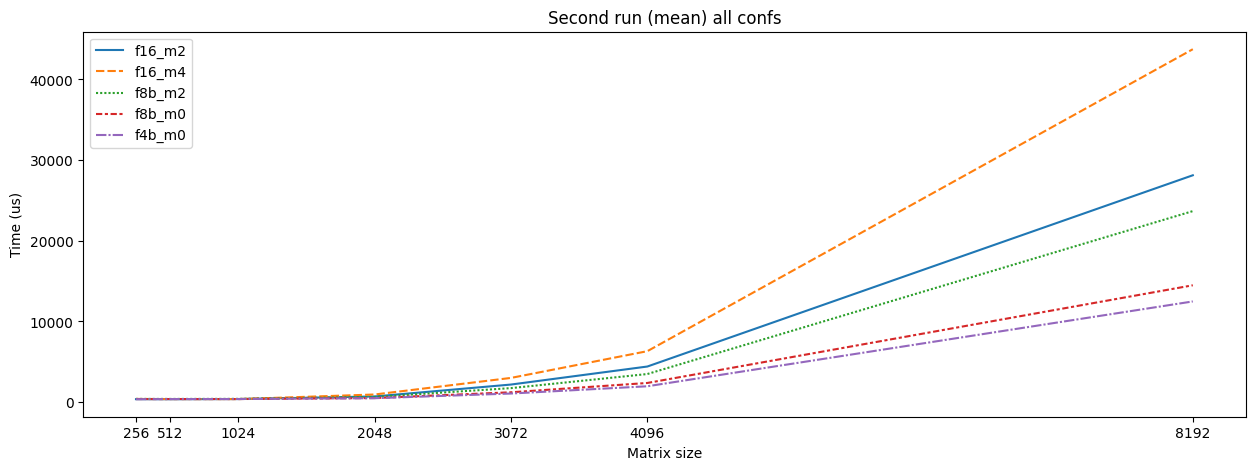

In [21]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_sr, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Second run (mean) all confs")

plt.show()

In [22]:
df_avg = get_column_df_info(df, 'inference_time_avg')
df_avg

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,257.33,243.64,246.66,247.37,246.83
512,244.19,244.95,252.00,251.83,246.46
1024,243.73,248.80,250.38,250.54,259.20
2048,399.80,674.03,359.18,250.40,247.24
3072,1990.74,2877.01,1510.97,989.06,820.91
4096,4383.52,6364.27,3385.24,2233.29,1773.07
8192,29435.45,45940.03,24773.45,15113.17,12931.69


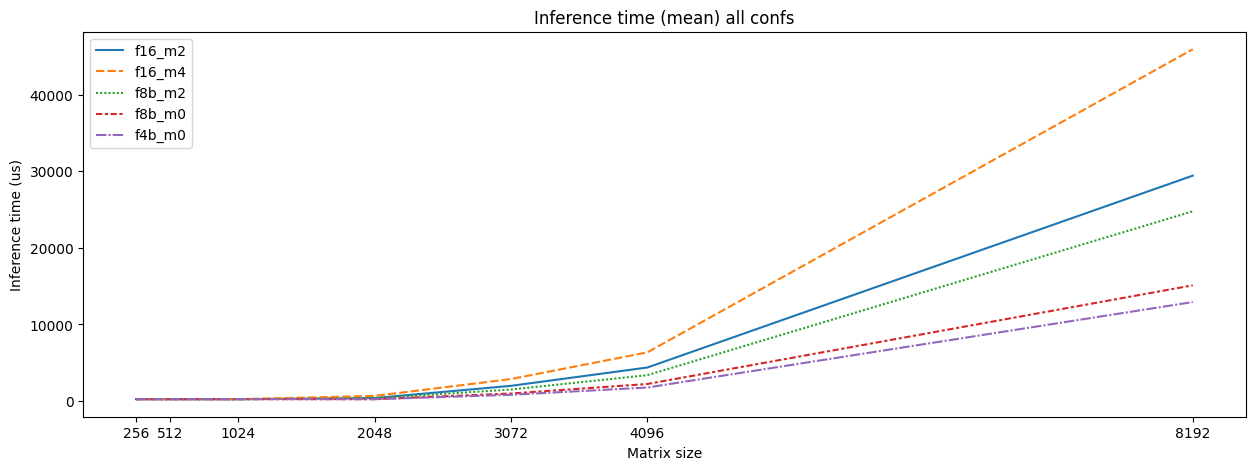

In [23]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_avg, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

In [24]:
df_avg_dtype = get_column_df_info(df, 'inference_time_avg', c_name='dtype', mean=True)
df_avg_dtype

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,250.485,247.015,246.83
512,244.570,251.915,246.46
1024,246.265,250.460,259.20
2048,536.915,304.790,247.24
3072,2433.875,1250.015,820.91
4096,5373.895,2809.265,1773.07
8192,37687.740,19943.310,12931.69


In [25]:
df_avg_math_fidelity = get_column_df_info(df, 'inference_time_avg', c_name='math_fidelity', mean=True)
df_avg_math_fidelity

,MathFidelity.HiFi2,MathFidelity.HiFi4,MathFidelity.LoFi
256,251.995,243.64,247.100
512,248.095,244.95,249.145
1024,247.055,248.80,254.870
2048,379.490,674.03,248.820
3072,1750.855,2877.01,904.985
4096,3884.380,6364.27,2003.180
8192,27104.450,45940.03,14022.430


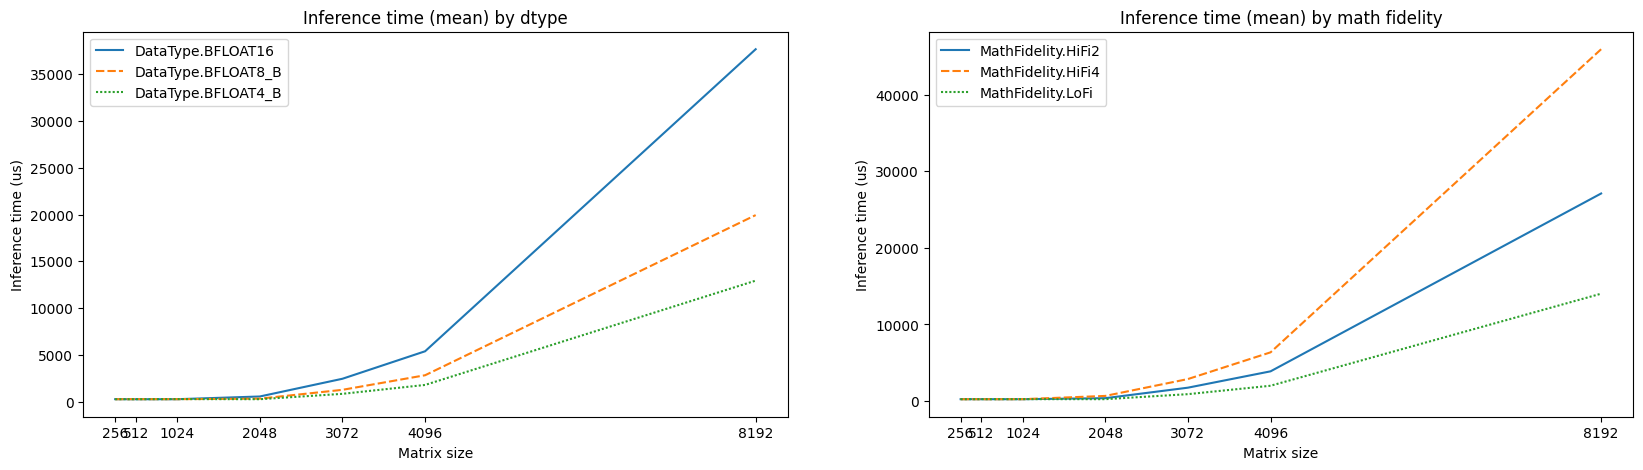

In [26]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

plot = sns.lineplot(df_avg_dtype, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) by dtype")

plot = sns.lineplot(df_avg_math_fidelity, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) by math fidelity")

plt.show()


In [27]:
(df_sr - df_avg)/df_sr * 100

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,30.758261,38.229851,39.091785,36.954915,32.977626
512,33.177353,36.107778,37.265055,35.100379,36.161836
1024,36.713232,34.761518,38.728465,35.406193,33.749105
2048,43.582073,29.155368,44.458705,50.922169,49.690705
3072,8.856413,4.308911,13.262342,19.336133,23.320287
4096,0.787854,-0.679447,2.941927,6.162314,10.056713
8192,-4.667640,-5.016753,-4.615489,-4.313576,-3.574827


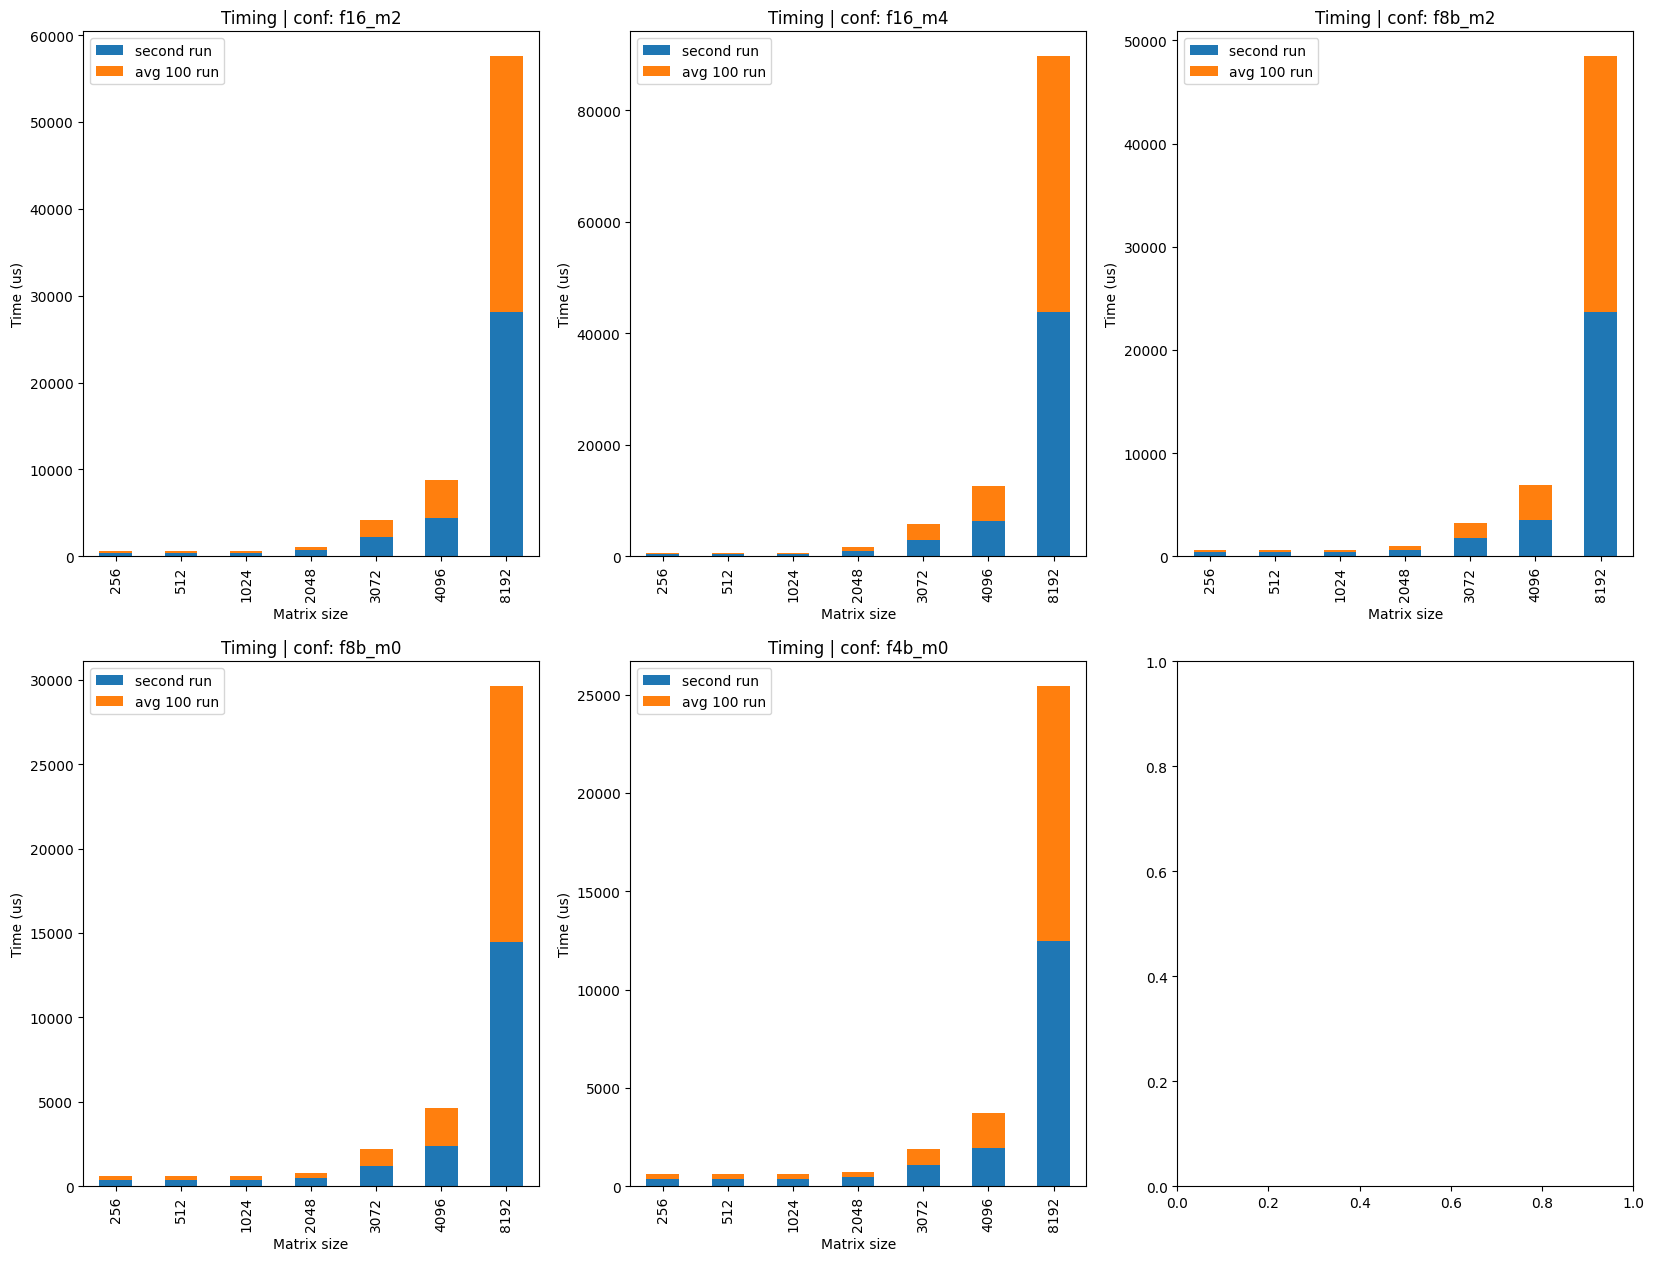

In [28]:
fig, axs = plt.subplots(2,3, figsize=(20,15))
i, j = 0, 0
for conf in df_avg.columns:
    df_combined = pd.concat([df_sr[conf], df_avg[conf]], axis=1)
    df_combined.columns = ["second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[i][j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

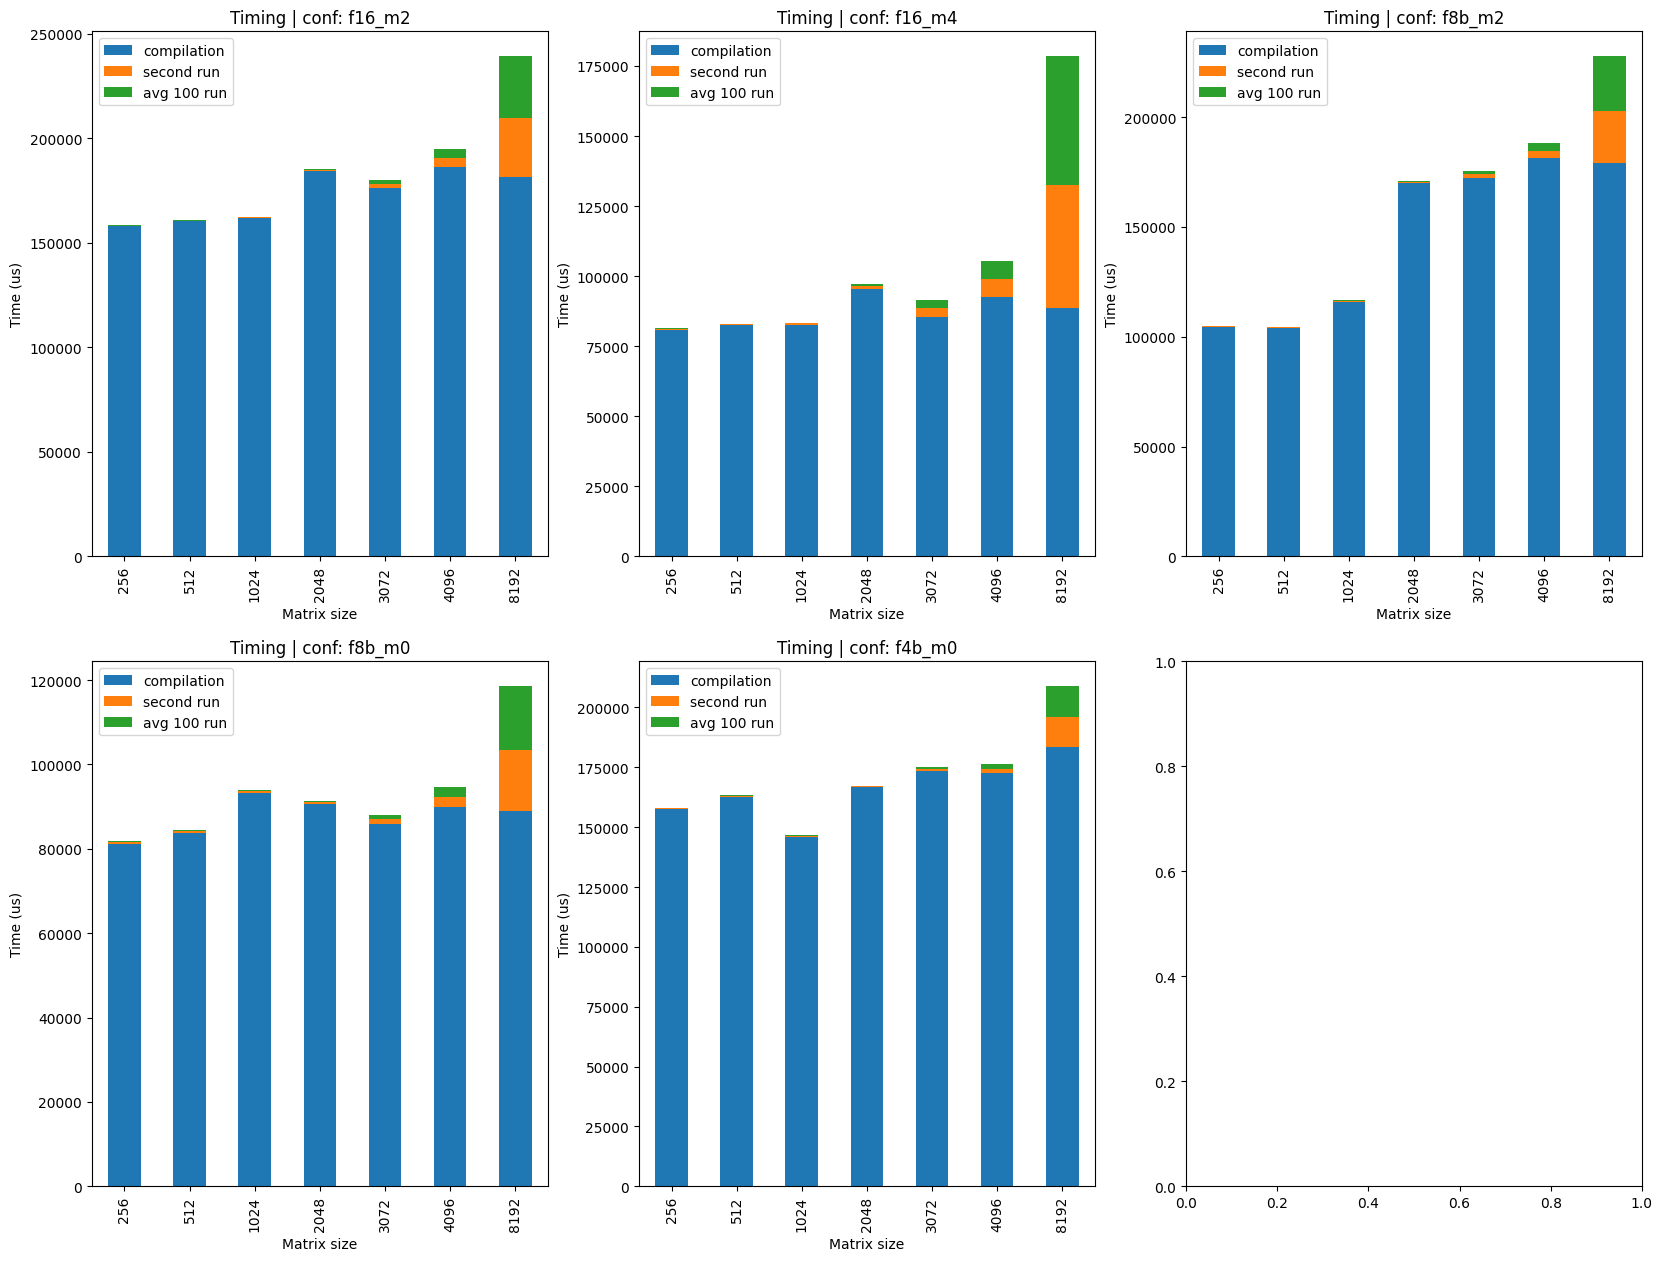

In [29]:
fig, axs = plt.subplots(2,3, figsize=(20,15))
i, j = 0, 0
for conf in df_avg.columns:
    df_combined = pd.concat([df_compile[conf], df_sr[conf], df_avg[conf]], axis=1)
    df_combined.columns = ["compilation", "second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[i][j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

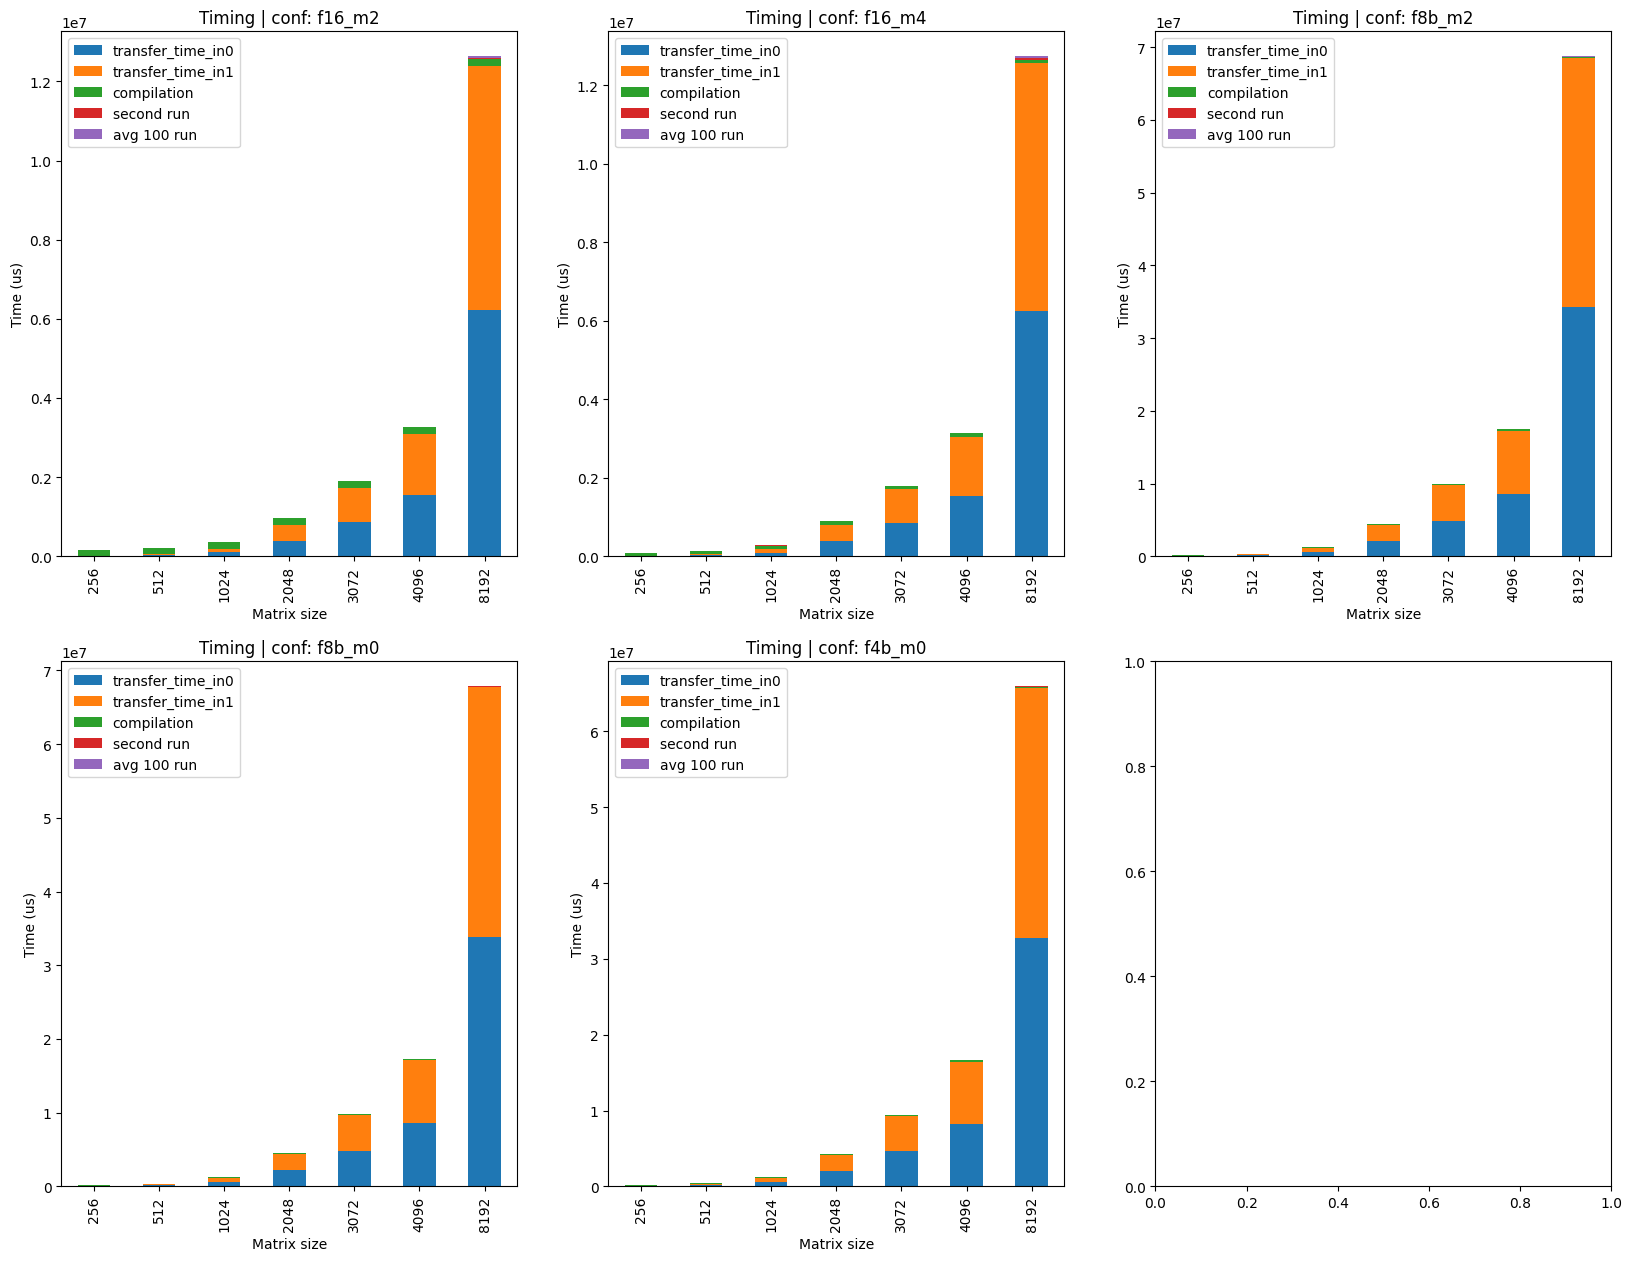

In [30]:
fig, axs = plt.subplots(2,3, figsize=(20,15))
i, j = 0, 0
for conf in df_avg.columns:
    df_combined = pd.concat([df_transf0[conf], df_transf1[conf], df_compile[conf], df_sr[conf], df_avg[conf]], axis=1)
    df_combined.columns = ["transfer_time_in0", "transfer_time_in1", "compilation", "second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[i][j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

### Torch comparison 

#### Torch bf16

In [31]:
df_torch = pd.concat([pd.read_csv("./results/torch_bfp16.csv", index_col="m"), pd.read_csv("./results/torch_fp32.csv", index_col="m")], axis=1)
df_compare_conf_torch = pd.concat([df_avg, df_torch], axis=1)
df_compare_conf_torch

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0,torch_bfp16,torch_fp32
256,257.33,243.64,246.66,247.37,246.83,8.491991e+03,8.206129e+01
512,244.19,244.95,252.00,251.83,246.46,1.669232e+05,4.992867e+02
1024,243.73,248.80,250.38,250.54,259.20,1.433732e+06,3.081963e+03
2048,399.80,674.03,359.18,250.40,247.24,2.732600e+07,2.506427e+04
3072,1990.74,2877.01,1510.97,989.06,820.91,9.042670e+07,8.344136e+04
4096,4383.52,6364.27,3385.24,2233.29,1773.07,3.248094e+08,2.274305e+05
8192,29435.45,45940.03,24773.45,15113.17,12931.69,3.198951e+09,1.653865e+06


CPU Torch fp16 is out of scale (working single core)

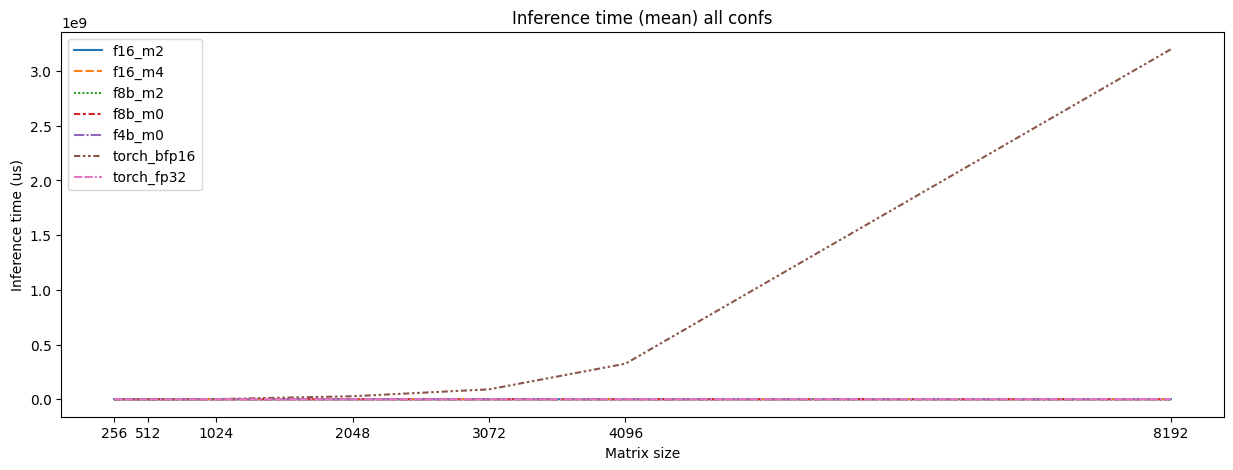

In [32]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

Smaller window and ignore fp16

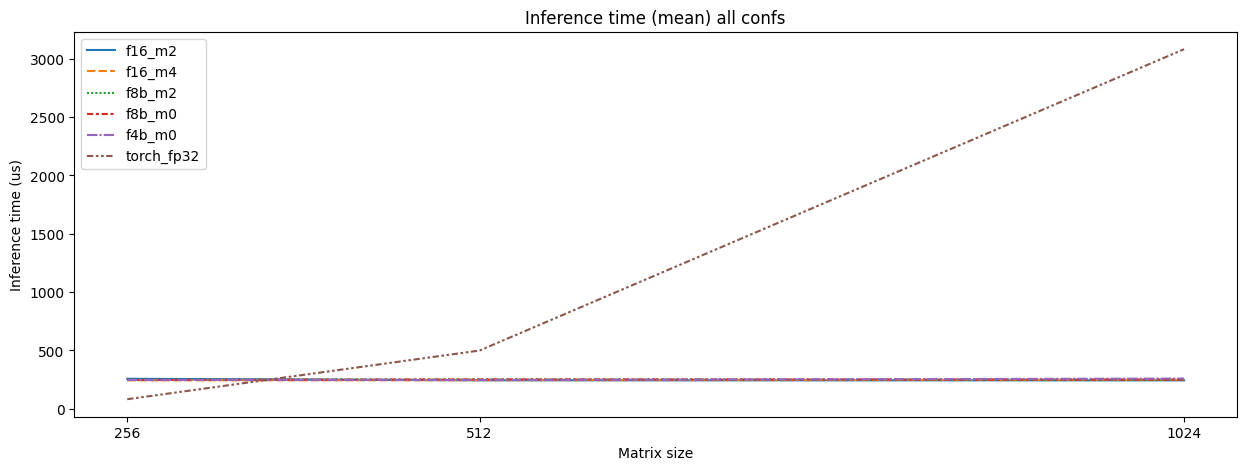

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
window = 3

plot = sns.lineplot(df_compare_conf_torch.drop("torch_bfp16", axis=1).iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

##### Torch comparison including transfer time

In [34]:
df_compare_conf_torch_tot = pd.concat([df_transf0 + df_transf1 + df_compile + df_avg, df_torch], axis=1)
df_compare_conf_torch_tot

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0,torch_bfp16,torch_fp32
256,171653.12,94682.86,180106.64,157248.16,225853.49,8.491991e+03,8.206129e+01
512,210236.16,132385.81,386168.81,355725.86,420498.30,1.669232e+05,4.992867e+02
1024,355728.30,276204.27,1238574.82,1210629.52,1214318.33,1.433732e+06,3.081963e+03
2048,977564.15,892804.13,4472441.48,4470508.61,4246827.08,2.732600e+07,2.506427e+04
3072,1908462.52,1793949.42,9930297.88,9793072.02,9443180.88,9.042670e+07,8.344136e+04
4096,3271329.93,3136561.48,17463022.54,17280398.19,16631595.42,3.248094e+08,2.274305e+05
8192,12603189.21,12689184.42,68701494.66,67822272.78,65916730.65,3.198951e+09,1.653865e+06


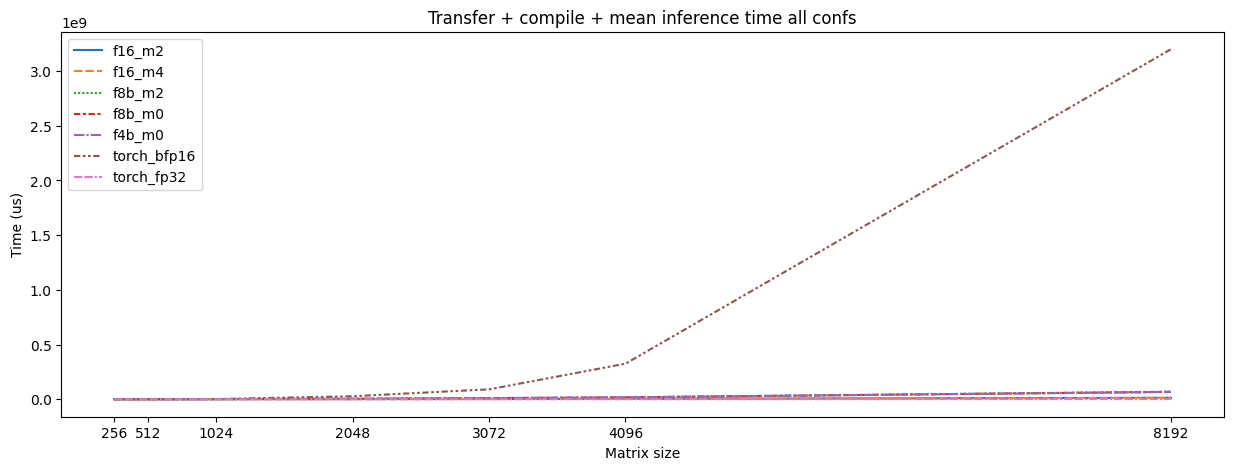

In [35]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch_tot, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer + compile + mean inference time all confs")

plt.show()

Smaller window. A single matmul is always faster on CPU (torch_32) due to the overhead

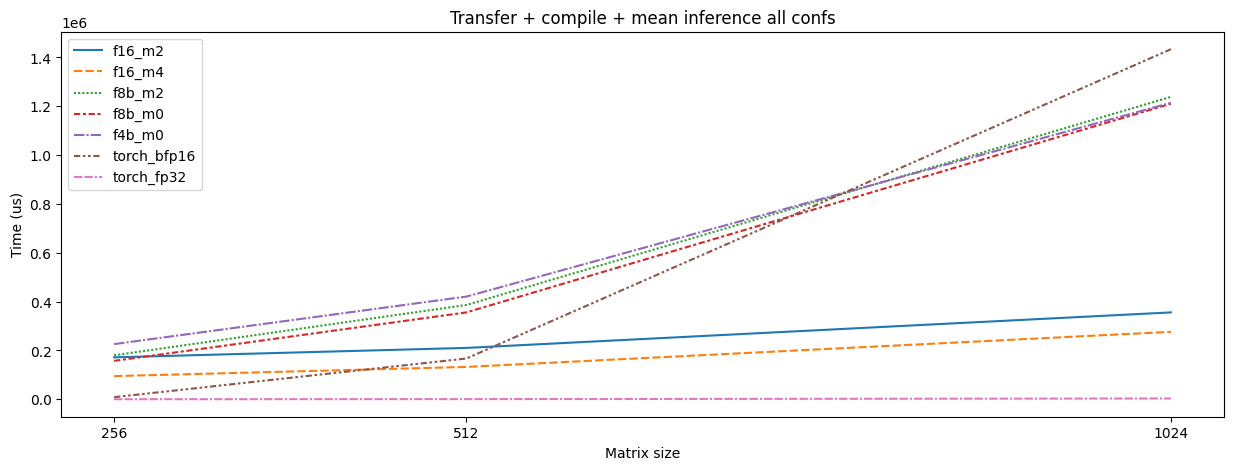

In [36]:
fig, ax = plt.subplots(figsize=(15,5))

window = 3
plot = sns.lineplot(df_compare_conf_torch_tot.iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer + compile + mean inference all confs")

plt.show()

## Acceleration vs CPU

$$
CPU_t = \mathcal{N} \text{matmul}_{CPU}\\
TT_t = \text{transfer}_t + \text{compilation}_t + \mathcal{N} \text{matmul}_{TT} \\
$$

To obtain $TT_t < CPU_t$, we need to size N: 

$
    \text{transfer}_t + \text{compilation}_t < \mathcal{N}(\text{matmul}_{CPU} - \text{matmul}_{TT})\\
$

$$
    \mathcal{N} > \frac{\text{transfer}_t + \text{compilation}_t}{\text{matmul}_{CPU} - \text{matmul}_{TT}}
$$

In [37]:
df_overhead = (df_transf0 + df_transf1 + df_compile)
df_overhead

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,171395.79,94439.22,179859.98,157000.79,225606.66
512,209991.97,132140.86,385916.81,355474.03,420251.84
1024,355484.57,275955.47,1238324.44,1210378.98,1214059.13
2048,977164.35,892130.10,4472082.30,4470258.21,4246579.84
3072,1906471.78,1791072.41,9928786.91,9792082.96,9442359.97
4096,3266946.41,3130197.21,17459637.30,17278164.90,16629822.35
8192,12573753.76,12643244.39,68676721.21,67807159.61,65903798.96


In [38]:
df_accl = ((- df_avg).add(df_torch['torch_fp32'], axis=0))
df_accl

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,-1.752687e+02,-1.615787e+02,-1.645987e+02,-1.653087e+02,-1.647687e+02
512,2.550967e+02,2.543367e+02,2.472867e+02,2.474567e+02,2.528267e+02
1024,2.838233e+03,2.833163e+03,2.831583e+03,2.831423e+03,2.822763e+03
2048,2.466447e+04,2.439024e+04,2.470509e+04,2.481387e+04,2.481703e+04
3072,8.145062e+04,8.056435e+04,8.193039e+04,8.245230e+04,8.262045e+04
4096,2.230470e+05,2.210662e+05,2.240453e+05,2.251972e+05,2.256574e+05
8192,1.624430e+06,1.607925e+06,1.629092e+06,1.638752e+06,1.640933e+06


In [39]:
df_N_accl = df_overhead / df_accl
df_N_accl

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,-977.902962,-584.478119,-1092.718046,-949.743003,-1369.232429
512,823.185913,519.550993,1560.605101,1436.510305,1662.213368
1024,125.248548,97.401902,437.325840,427.480794,430.096010
2048,39.618302,36.577343,181.018674,180.151607,171.115567
3072,23.406474,22.231576,121.185646,118.760583,114.285994
4096,14.646898,14.159545,77.929063,76.724595,73.694991
8192,7.740412,7.863081,42.156453,41.377321,40.162388


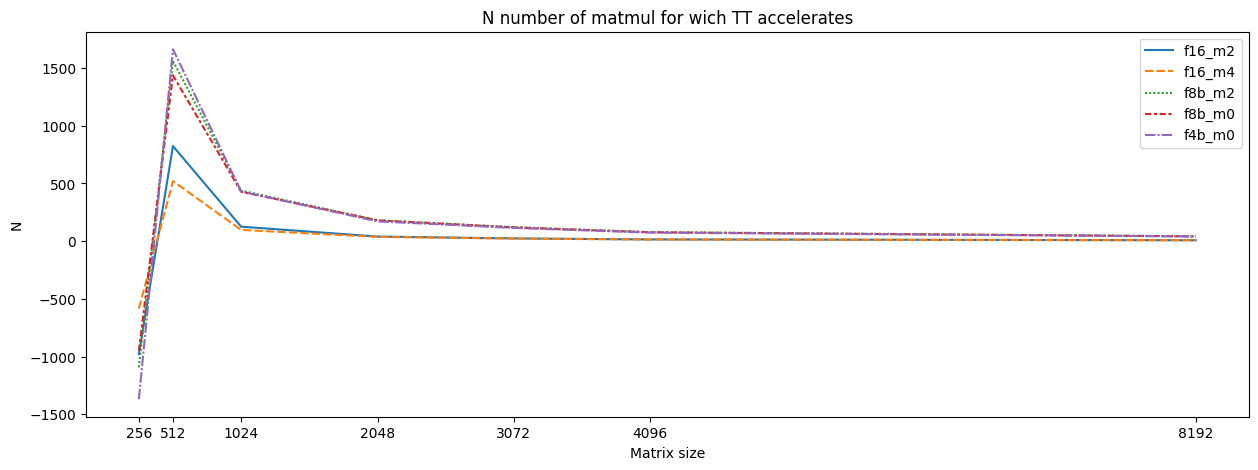

In [40]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_N_accl, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("N")
plot.set_title("N number of matmul for wich TT accelerates")

plt.show()

## More on offloading 

In [4]:
df_info_offloading = pd.read_csv("./results/1.0/offloading_1.0.csv")
df_info_offloading

,conf,m,grid_size,in0_sharded,out_sharded,in0_storage_type,out_storage_type,in1_storage_type,dtype,math_fidelity,torch_creation,ttnn_creation,to_layout,to_device
0,f16_m2,256,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,81.51,1274.38,6695.68,1177.81
1,f16_m2,512,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,667.59,2768.41,24613.24,2610.06
2,f16_m2,1024,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,1235.75,10723.25,95887.16,8812.62
3,f16_m2,2048,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,11597.99,42047.32,391388.34,34532.26
4,f16_m2,3072,"(8, 8)",False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,12144.78,92674.91,845914.82,72345.47
5,f16_m2,4096,"(8, 8)",False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,11341.86,167673.47,1512971.83,129991.94
6,f16_m2,8192,"(8, 8)",False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,43359.47,663592.47,6044519.76,517420.29
7,f16_m4,256,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,1408.73,797.53,6401.94,1101.99
8,f16_m4,512,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,191.82,2840.46,25100.92,2657.03
9,f16_m4,1024,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,3466.09,10700.81,95082.95,8770.30


In [30]:
c = 'f16_m2'
df_transfers = pd.DataFrame()
df_transfers['to_device'] = get_column_df_info(df_info_offloading, d_name="to_device")[c]
df_transfers['from_torch'] = get_column_df_info(df, 'transfer_time_in0', mean=True)[c]
df_transfers['to_layout'] = get_column_df_info(df_info_offloading, d_name="to_layout")[c]
df_transfers

,to_device,from_torch,to_layout
256,1177.81,7054.76,6695.68
512,2610.06,25440.96,24613.24
1024,8812.62,97830.64,95887.16
2048,34532.26,395579.62,391388.34
3072,72345.47,862264.18,845914.82
4096,129991.94,1547072.15,1512971.83
8192,517420.29,6231834.34,6044519.76


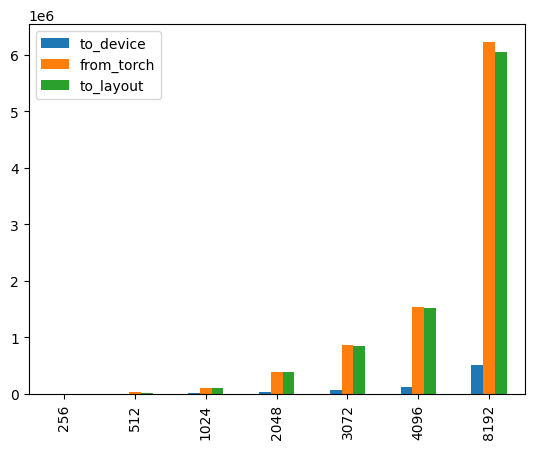

In [33]:
fig, axs = plt.subplots()
# Create a stacked bar plot
plot = df_transfers.plot(kind='bar', ax=axs)
plt.show()

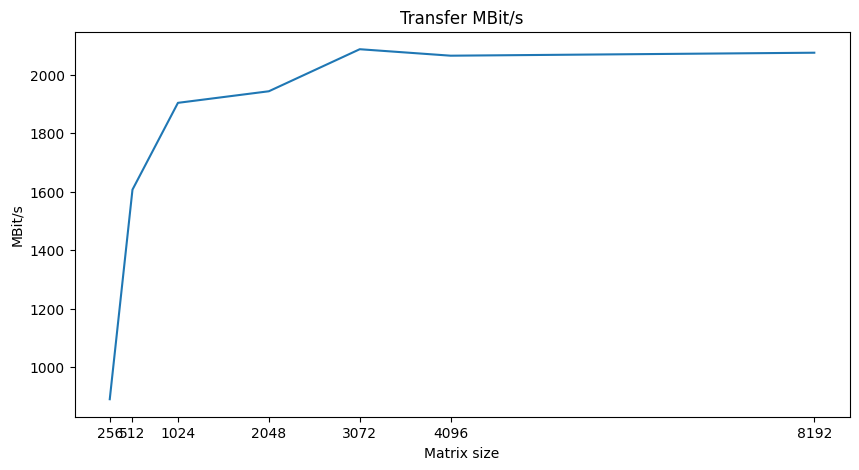

In [ ]:
df_transf_norm_b = pd.DataFrame()
elements = df_transfers['to_device'].index * df_transfers['to_device'].index

df_transf_norm_b = (16 * elements) / df_transfers['to_device']

fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("MBit/s")
plot.set_title("Transfer MBit/s")

plt.show()